**Prática de Segmentação de imagens**

In [121]:
# code here
import sys
import cv2
sys.path.insert(0, '../Modules/')

from Modules import Commons
from Modules import Kernels


<module 'Modules.Commons' from '/Users/gabrielsantos/PycharmProjects/pythonProject/pgc111-labs-2023/Modules/Commons.py'>

In [175]:
import importlib

importlib.reload(Commons)  # Reload the module
importlib.reload(Kernels)  # Reload the module


<module 'Modules.Kernels' from '/Users/gabrielsantos/PycharmProjects/pythonProject/pgc111-labs-2023/Modules/Kernels.py'>

In [176]:
from Modules.Commons import *
from Modules.Kernels import *

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

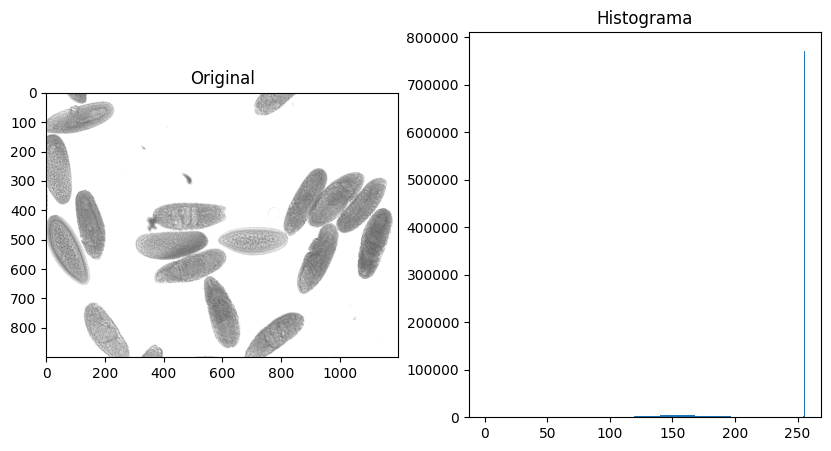

In [56]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

# Showing image
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].set_title('Original')
axarr[0].imshow(img1, cmap='gray' ,vmin=0, vmax=255)

axarr[1].set_title('Histograma')
axarr[1].hist(img1.ravel(), 256, [0, 256])


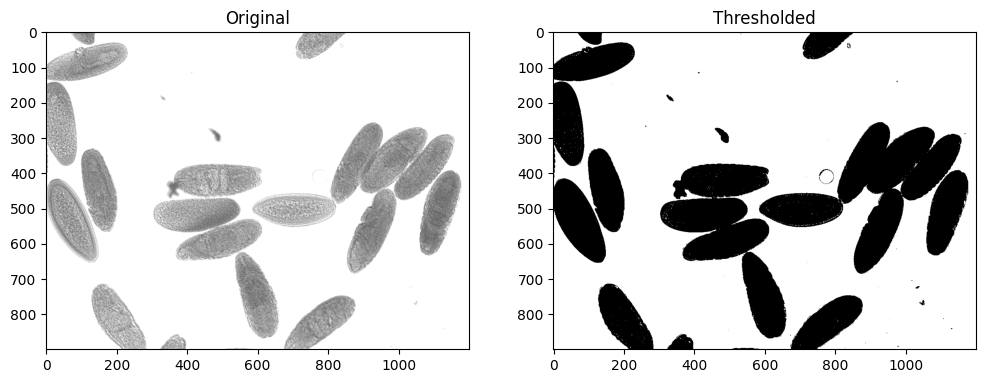

In [61]:
# Selecting 250 as threshold value
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
img = img1.copy()
img1 = threshold_image(img1, 250)

# Printing
images = np.array([[img, img1]])
labels = np.array([['Original', 'Thresholded']])
print_images(labels, images, _figsize=(12, 12))

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

In [50]:
def adaptative_threshold(hist, initial):
    threshold = int(initial)
    while True:
        print(threshold)
        result = [index * value for index, value in enumerate(hist)]
        c1 = np.sum(hist[:threshold])
        c2 = np.sum(hist[threshold:])
        s1 = np.sum(result[:threshold])
        s2 = np.sum(result[threshold:])
        m1 = s1 / c1
        m2 = s2 / c2
        new_threshold = int((m1 + m2) / 2)
        if new_threshold == threshold:
            break
        threshold = new_threshold
    return threshold


In [86]:
#Sem suavização prévia
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
l_hist = histogram(img1, max(img1.ravel()))

print('Computing Adptative Threshold:')
t = adaptative_threshold(l_hist, np.mean(img1))
print('Threshold: ', t)

img_orig = img1.copy()
img_orig_thresholded = threshold_image(img1, t)


(900, 1200)
Computing Adptative Threshold:
228
201
188
182
180
178
177
Threshold:  177


In [179]:
# Com Suavização prévia
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
img1 = convolution(img1, mean_kernel((5,5)))
img1 = img1.astype(int)
l_hist = histogram(img1, int(max(img1.ravel())))

print('Computing Adptative Threshold:')
t = adaptative_threshold(l_hist, np.mean(img1))
print('Threshold: ', t)

img_smooth = img1.copy()
img_smooth_thresholded = threshold_image(img1, t)

(900, 1200)
Computing Adptative Threshold:
228
203
190
183
179
178
177
176
Threshold:  176


À medida que vou suavizando mais, meu threshold vai mudando

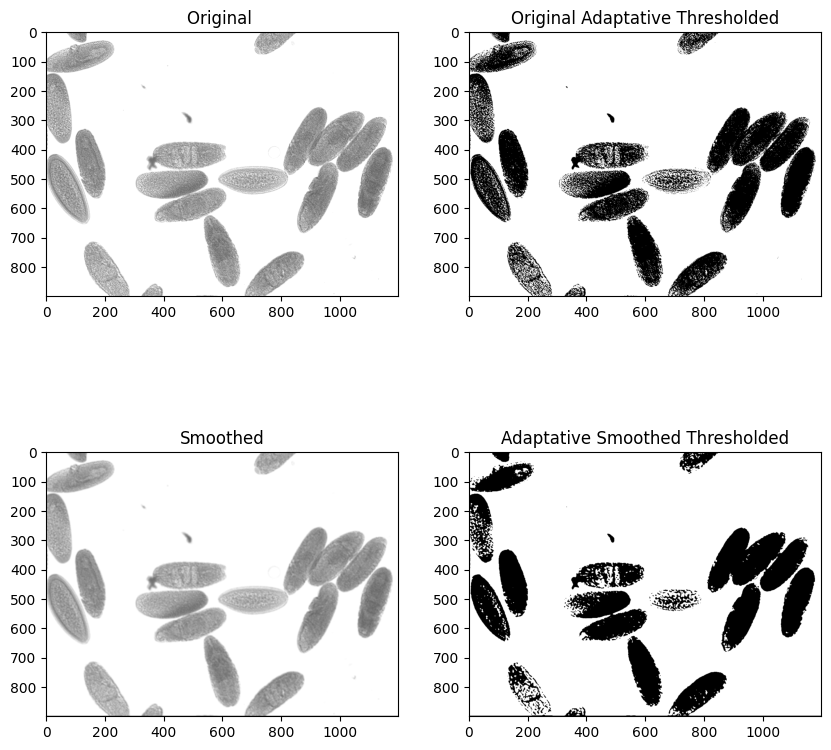

In [182]:
# Printing
images = np.array([[img_orig, img_orig_thresholded], [img_smooth, img_smooth_thresholded]])
labels = np.array([['Original ', 'Original Adaptative Thresholded'], ['Smoothed', 'Adaptative Smoothed Thresholded']])
print_images(labels, images, _figsize=(10, 10))

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

In [226]:
def otsu(img1):
    L = int(max(img1.ravel()) + 1)
    # get histogram with cv2
    hist = cv2.calcHist([img1], [0], None, [L], [0, L])
    # normalize it to 0-1
    hist_norm = hist/hist.sum()
    # get probabilities of each class
    prob1 = np.zeros(L)
    prob2 = np.zeros(L)
    m1 = np.zeros(L)
    m2 = np.zeros(L)
    var = np.zeros(L)
    T = np.zeros(L)
    # get global mean of image
    mg = np.sum([i * hist_norm[i] for i in range(L)])
    print('mg: ', mg)
    #get global var of image
    vg = np.sum([((i - mg) ** 2) * hist_norm[i] for i in range(L)])
    print('vg: ', vg)

    for i in range(L):
        prob1[i] = np.sum(hist_norm[:i])
        prob2[i] = 1 - prob1[i]
        m1[i] = np.sum([j * hist_norm[j] for j in range(i)]) / prob1[i]
        m1[i] = 0 if np.isnan(m1[i]) else m1[i]
        m2[i] = np.sum([j * hist_norm[j] for j in range(i, L)]) / prob2[i]
        m2[i] = 0 if np.isnan(m2[i]) else m2[i]
        var[i] = prob1[i] * (m1[i] - mg) ** 2 + prob2[i] * (m2[i] - mg) ** 2
        T[i] = var[i]/vg

    return var, np.nanargmax(T)

mg:  228.95236
vg:  1984.5793
Threshold:  205


/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


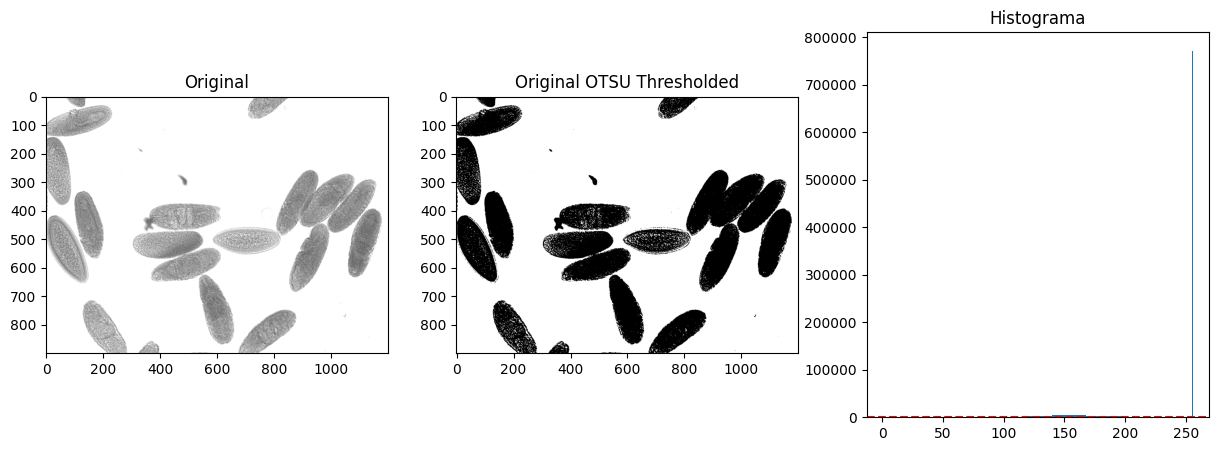

In [227]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
var, t = otsu(img1)
print('Threshold: ', t)

img_orig = img1.copy()
img_orig_thresholded = threshold_image(img1, t)

# Printing
#images = np.array([[img_orig, img_orig_thresholded]])
#labels = np.array([['Original', 'Original OTSU Thresholded']])
#print_images(labels, images, _figsize=(12, 12))

# Showing image
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].set_title('Original')
axarr[0].imshow(img_orig, cmap='gray' ,vmin=0, vmax=255)

axarr[1].set_title('Original OTSU Thresholded')
axarr[1].imshow(img_orig_thresholded, cmap='gray' ,vmin=0, vmax=255)

axarr[2].set_title('Histograma')
axarr[2].hist(img_orig.ravel(), 256, [0, 256])
axarr[2].axhline(y=var.all(), color='r', linestyle='--')



mg:  226.3914
vg:  1818.9137
Threshold:  207


/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


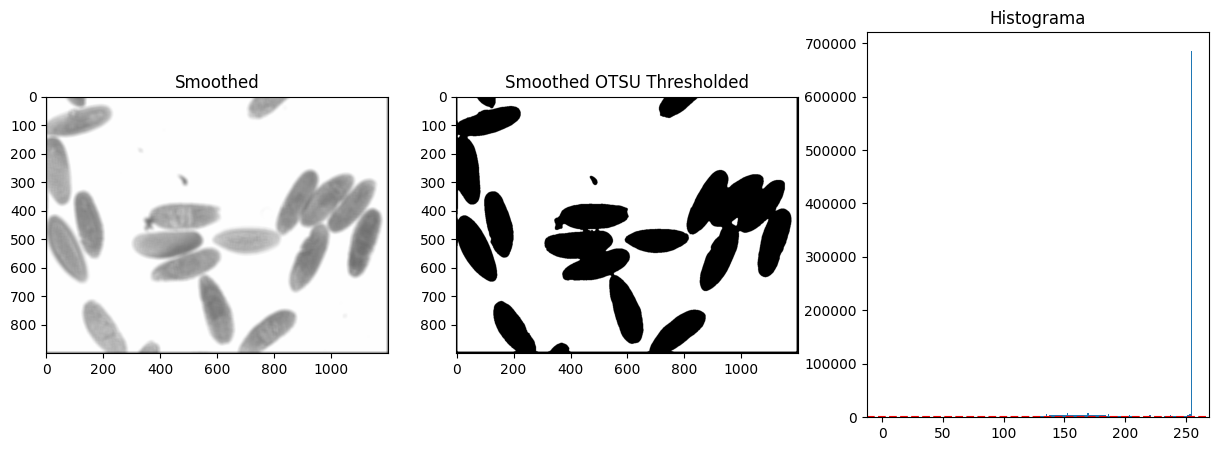

In [232]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
img1 = convolution(img1, mean_kernel((15,15)))
img1 = img1.astype(np.uint8)
var, t = otsu(img1)
print('Threshold: ', t)

img_orig = img1.copy()
img_orig_thresholded = threshold_image(img1, t)

# Showing image
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].set_title('Smoothed')
axarr[0].imshow(img_orig, cmap='gray' ,vmin=0, vmax=255)

axarr[1].set_title('Smoothed OTSU Thresholded')
axarr[1].imshow(img_orig_thresholded, cmap='gray' ,vmin=0, vmax=255)

axarr[2].set_title('Histograma')
axarr[2].hist(img_orig.ravel(), 256, [0, 256])
axarr[2].axhline(y=var.all(), color='r', linestyle='--')

4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

mg:  179.54556
vg:  3367.741
Threshold:  179


/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


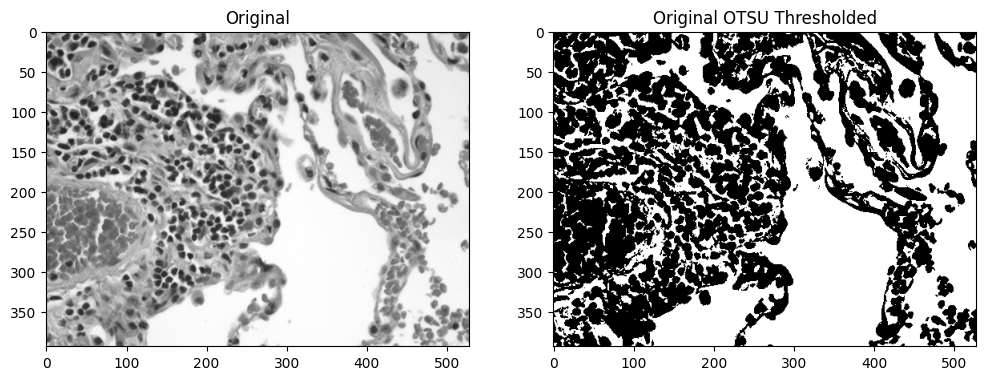

In [233]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
var, t = otsu(img1)
print('Threshold: ', t)

img_orig = img1.copy()
img_orig_thresholded = threshold_image(img1, t)

# Printing
images = np.array([[img_orig, img_orig_thresholded]])
labels = np.array([['Original', 'Original OTSU Thresholded']])
print_images(labels, images, _figsize=(12, 12))

mg:  122.29088
vg:  3689.4214
Threshold:  113


/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


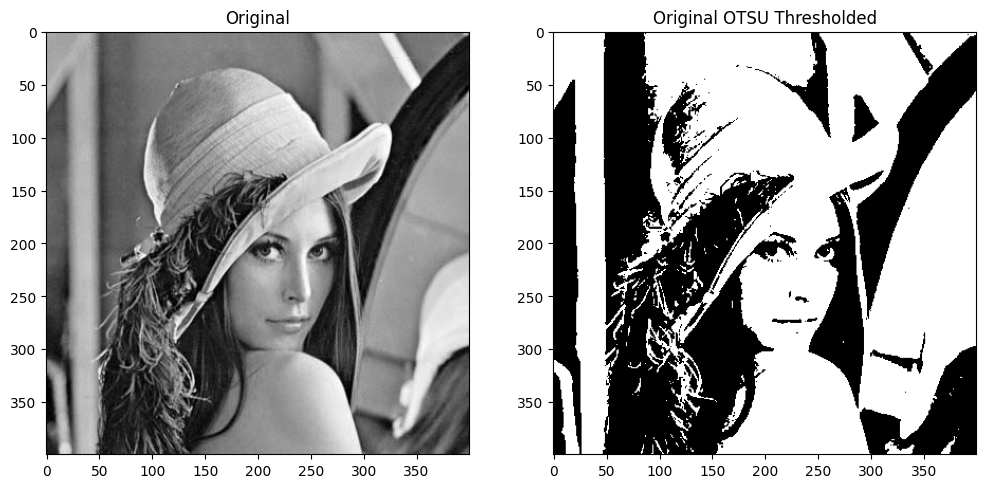

In [235]:
img1 = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
img_orig = img1.copy()
var, t = otsu(img1)
print('Threshold: ', t)


img_orig_thresholded = threshold_image(img1, t)

# Printing
images = np.array([[img_orig, img_orig_thresholded]])
labels = np.array([['Original', 'Original OTSU Thresholded']])
print_images(labels, images, _figsize=(12, 12))

mg:  129.61528
vg:  1790.3735
Threshold:  129


/Library/Python/3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


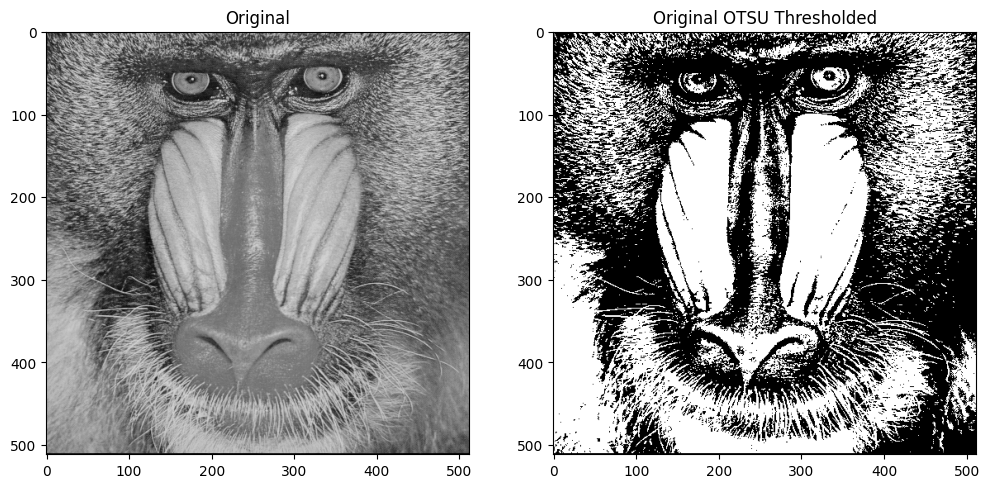

In [236]:
img1 = cv2.imread("madrill.tiff", cv2.IMREAD_GRAYSCALE)
img_orig = img1.copy()
var, t = otsu(img1)
print('Threshold: ', t)


img_orig_thresholded = threshold_image(img1, t)

# Printing
images = np.array([[img_orig, img_orig_thresholded]])
labels = np.array([['Original', 'Original OTSU Thresholded']])
print_images(labels, images, _figsize=(12, 12))